<a href="https://colab.research.google.com/github/girishthorat/Fraud-Detection/blob/main/LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # data split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Data = pd.read_pickle('/content/drive/MyDrive/Pattern_Recognition /Data.pickle')


In [ ]:
Data.head(10)

,creditLimit,availableMoney,transactionAmount,currentBalance,cardPresent,expirationDateKeyInMatch,isCVVcorrect,isCountrySame,posEntryMode_05,posEntryMode_09,posEntryMode_80,posEntryMode_90,posConditionCode_08,posConditionCode_99,merchantCategoryCode_auto,merchantCategoryCode_cable/phone,merchantCategoryCode_entertainment,merchantCategoryCode_fastfood,merchantCategoryCode_food,merchantCategoryCode_food_delivery,merchantCategoryCode_fuel,merchantCategoryCode_furniture,merchantCategoryCode_gym,merchantCategoryCode_health,merchantCategoryCode_hotels,merchantCategoryCode_mobileapps,merchantCategoryCode_online_gifts,merchantCategoryCode_online_retail,merchantCategoryCode_online_subscriptions,merchantCategoryCode_personal care,merchantCategoryCode_rideshare,merchantCategoryCode_subscriptions,transactionType_PURCHASE,transactionType_REVERSAL,Difference_open,Difference_exp,Difference_address,isFraud
0,5000,5000.0,98.55,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,518,-2483,518,0
1,5000,5000.0,74.51,0.0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,577,-2669,577,0
2,5000,5000.0,7.47,0.0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,605,-3188,605,0
3,5000,5000.0,7.47,0.0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,637,-3156,637,0
4,5000,5000.0,71.18,0.0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,231,-4939,231,0
5,5000,5000.0,30.76,0.0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,257,-1352,257,0
6,5000,5000.0,57.28,0.0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,289,-1441,289,0
7,5000,5000.0,9.37,0.0,1,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,302,-1673,302,0
9,5000,5000.0,164.37,0.0,1,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,340,-1360,340,0
10,5000,5000.0,160.18,0.0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,398,-2427,398,0


In [ ]:
Data['creditLimit'] = StandardScaler().fit_transform(np.array(Data['creditLimit']).reshape(-1, 1))
Data['availableMoney'] = StandardScaler().fit_transform(np.array(Data['availableMoney']).reshape(-1, 1))
Data['transactionAmount'] = StandardScaler().fit_transform(np.array(Data['transactionAmount']).reshape(-1, 1))
Data['currentBalance'] = StandardScaler().fit_transform(np.array(Data['currentBalance']).reshape(-1, 1))
Data['Difference_open'] = StandardScaler().fit_transform(np.array(Data['Difference_open']).reshape(-1, 1))
Data['Difference_exp'] = StandardScaler().fit_transform(np.array(Data['Difference_exp']).reshape(-1, 1))
Data['Difference_address'] = StandardScaler().fit_transform(np.array(Data['Difference_address']).reshape(-1, 1))


In [ ]:
Data.head()

,creditLimit,availableMoney,transactionAmount,currentBalance,cardPresent,expirationDateKeyInMatch,isCVVcorrect,isCountrySame,posEntryMode_05,posEntryMode_09,posEntryMode_80,posEntryMode_90,posConditionCode_08,posConditionCode_99,merchantCategoryCode_auto,merchantCategoryCode_cable/phone,merchantCategoryCode_entertainment,merchantCategoryCode_fastfood,merchantCategoryCode_food,merchantCategoryCode_food_delivery,merchantCategoryCode_fuel,merchantCategoryCode_furniture,merchantCategoryCode_gym,merchantCategoryCode_health,merchantCategoryCode_hotels,merchantCategoryCode_mobileapps,merchantCategoryCode_online_gifts,merchantCategoryCode_online_retail,merchantCategoryCode_online_subscriptions,merchantCategoryCode_personal care,merchantCategoryCode_rideshare,merchantCategoryCode_subscriptions,transactionType_PURCHASE,transactionType_REVERSAL,Difference_open,Difference_exp,Difference_address,isFraud
0,-0.49489,-0.140594,-0.260166,-0.698223,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,-0.524172,0.865204,0.104654,0
1,-0.49489,-0.140594,-0.422932,-0.698223,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.439597,0.736585,0.193504,0
2,-0.49489,-0.140594,-0.876834,-0.698223,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,-0.399460,0.377698,0.235671,0
3,-0.49489,-0.140594,-0.876834,-0.698223,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,-0.353588,0.399826,0.283861,0
4,-0.49489,-0.140594,-0.445478,-0.698223,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.935581,-0.833116,-0.327551,0


In [ ]:
X= Data.drop(['isFraud'], axis=1)
y= Data['isFraud']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 9589
Before OverSampling, counts of label '0': 611745 



/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (1223490, 37)
After OverSampling, the shape of train_y: (1223490,) 

After OverSampling, counts of label '1': 611745
After OverSampling, counts of label '0': 611745


In [ ]:
model = LinearDiscriminantAnalysis()
# fit model
model.fit(X_train_res, y_train_res)
# make a prediction
yhat = model.predict(X_test)
# summarize prediction


In [ ]:
confusion_matrix(y_test,yhat)

array([[100287,  52670],
       [   716,   1661]])

In [ ]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.99      0.66      0.79    152957
           1       0.03      0.70      0.06      2377

    accuracy                           0.66    155334
   macro avg       0.51      0.68      0.42    155334
weighted avg       0.98      0.66      0.78    155334



In [ ]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()

X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train)
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

Before Undersampling, counts of label '1': 9589
Before Undersampling, counts of label '0': 611745 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After Undersampling, the shape of train_X: (19178, 37)
After Undersampling, the shape of train_y: (19178,) 

After Undersampling, counts of label '1': 9589
After Undersampling, counts of label '0': 9589


In [ ]:
model = LinearDiscriminantAnalysis()
# fit model
model.fit(X_train_miss, y_train_miss)
# make a prediction
yhat = model.predict(X_test)
# summarize prediction


In [ ]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.98      0.20      0.34    152957
           1       0.02      0.79      0.03      2377

    accuracy                           0.21    155334
   macro avg       0.50      0.50      0.18    155334
weighted avg       0.97      0.21      0.33    155334



In [ ]:
# using features

In [ ]:
rfc = LinearDiscriminantAnalysis()
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X_train_res, y_train_res)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=LinearDiscriminantAnalysis(n_components=None, priors=None,
                                           shrinkage=None, solver='svd',
                                           store_covariance=False, tol=0.0001),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [ ]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 27


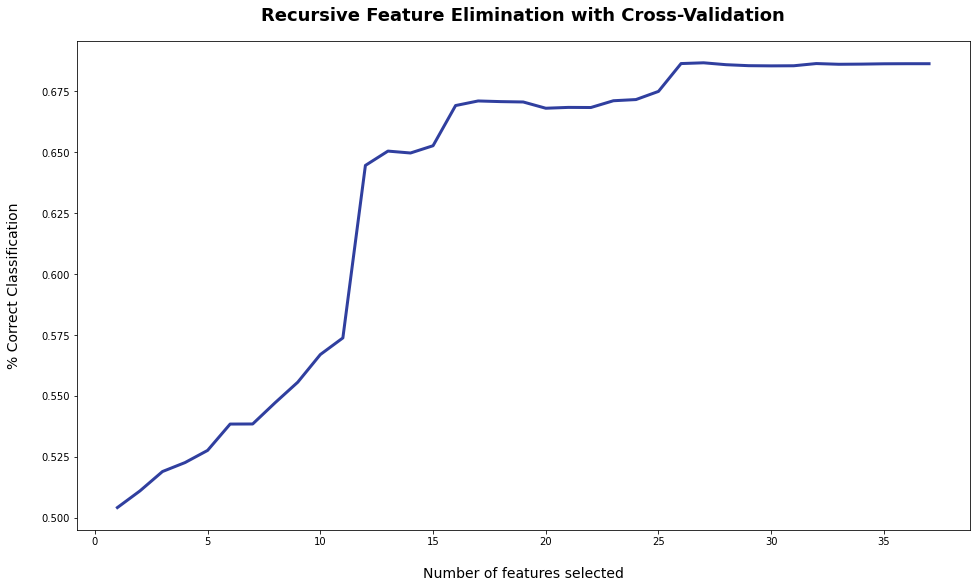

In [ ]:

plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [ ]:
print(np.where(rfecv.support_ == False)[0])

[ 0  1  3  4  5  6  9 34 35 36]


In [ ]:
# using these features

In [ ]:
Data1= Data.iloc[:,[ 2,7, 8,  10, 11, 12, 13, 14,15, 16, 17, 18,19,20, 21,22, 23, 24,25, 26, 27,28, 29, 30, 31, 32, 33,37]]
X= Data1.drop(['isFraud'], axis=1)
y= Data1['isFraud']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 9639
Before OverSampling, counts of label '0': 611695 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (1223390, 27)
After OverSampling, the shape of train_y: (1223390,) 

After OverSampling, counts of label '1': 611695
After OverSampling, counts of label '0': 611695


In [ ]:
model = LinearDiscriminantAnalysis()
model.fit(X_train_res, y_train_res)
yhat = model.predict(X_test)
print(classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.99      0.65      0.78    153007
           1       0.03      0.70      0.06      2327

    accuracy                           0.65    155334
   macro avg       0.51      0.68      0.42    155334
weighted avg       0.98      0.65      0.77    155334



In [ ]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()

X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train)
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

Before Undersampling, counts of label '1': 9639
Before Undersampling, counts of label '0': 611695 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After Undersampling, the shape of train_X: (19278, 27)
After Undersampling, the shape of train_y: (19278,) 

After Undersampling, counts of label '1': 9639
After Undersampling, counts of label '0': 9639


In [ ]:
model = LinearDiscriminantAnalysis()
# fit model
model.fit(X_train, y_train)
# make a prediction
yhat = model.predict(X_test)
# summarize prediction
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    153007
           1       0.08      0.00      0.00      2327

    accuracy                           0.98    155334
   macro avg       0.53      0.50      0.50    155334
weighted avg       0.97      0.98      0.98    155334



In [ ]:
#wrong
model = LinearDiscriminantAnalysis()
# fit model
model.fit(X_train_miss, y_train_miss)
# make a prediction
yhat = model.predict(X_train)
# summarize prediction
print(classification_report(y_train, yhat))

              precision    recall  f1-score   support

           0       0.98      0.20      0.33    611804
           1       0.01      0.78      0.03      9530

    accuracy                           0.21    621334
   macro avg       0.50      0.49      0.18    621334
weighted avg       0.97      0.21      0.33    621334



In [ ]:
y_train_res.var()

0.25